<a href="https://colab.research.google.com/github/IlTACK-OH/practical_statistics_for_data_scientists/blob/main/day3_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.7 상관관계

In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from google.colab import files
files.upload();

Saving sp500_data.csv to sp500_data.csv


In [19]:
sp500_px = pd.read_csv('sp500_data.csv')

In [20]:
sp500_sym = pd.read_csv('sp500_sectors.csv')

In [22]:
sp500_px.index=sp500_px['Unnamed: 0']

In [23]:
sp500_px.drop('Unnamed: 0',axis=1,inplace=True)

In [29]:
# 2012년 7월 1일 이상의 데이터 중, ETF에 속하는 데이터만 뽑아서 사용.
etfs = sp500_px.loc[sp500_px.index>'2012-07-01',sp500_sym[sp500_sym['sector']=='etf']['symbol']]

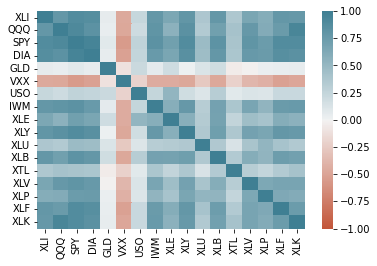

In [30]:
sns.heatmap(etfs.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,as_cmap=True))
# corr(): 상관계수
# vmin, vmax: 값의 최대,최소
# cmap: 색깔 결정

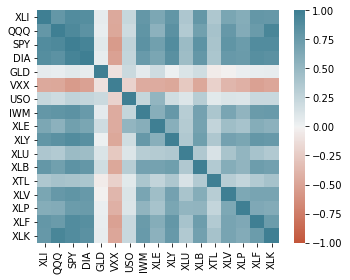

In [38]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

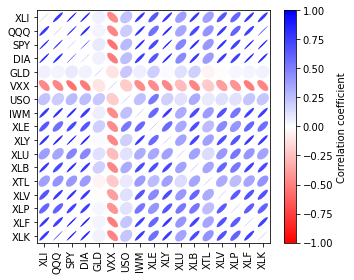

In [40]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()


위의 코드는 추후에 조금 더 뜯어봐야 할 것 같다. 아직 그 의미를 다 파악하지 못했다.

## 1.7.1 산점도

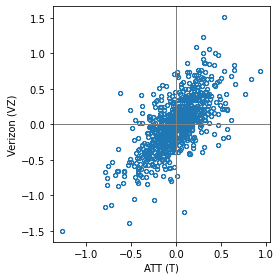

In [41]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

ax = telecom.plot.scatter(x='T',y='VZ',figsize=(4,4),marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0,color='grey',lw=1)
ax.axvline(0,color='grey',lw=1)

plt.tight_layout()
plt.show()

Line2D(_line1)


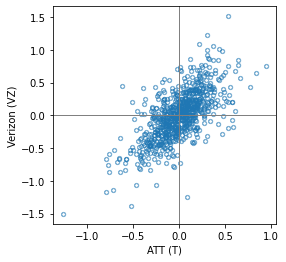

In [44]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))